# Metric Model

**Import Dependencies**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

**Preprocessing data function**

In [3]:
def preprocess_data(url, column_names):
    data = pd.read_csv(url, names=column_names)
    data["Volume"] = (
        (4 / 3) * np.pi * (data["Length"] * data["Diameter"] * data["Height"])
    )
    label_encoder = LabelEncoder()
    data["Sex"] = label_encoder.fit_transform(data["Sex"])
    X = data.drop(["Rings"], axis=1)
    y_age = data["Rings"]
    y_sex = data["Sex"]
    return X, y_age, y_sex

**Scaling and splitting data function**

In [4]:
def split_data(X, y_age, y_sex):
    X_scaled = StandardScaler().fit_transform(X)
    (
        X_train,
        X_test,
        y_age_train,
        y_age_test,
        y_sex_train,
        y_sex_test,
    ) = train_test_split(X_scaled, y_age, y_sex, test_size=0.2, random_state=42)
    X_train, X_val, y_age_train, y_age_val, y_sex_train, y_sex_val = train_test_split(
        X_train, y_age_train, y_sex_train, test_size=0.2, random_state=42
    )
    return (
        X_train,
        X_val,
        X_test,
        y_age_train,
        y_age_val,
        y_age_test,
        y_sex_train,
        y_sex_val,
        y_sex_test,
    )

**Model training function**

In [5]:
def train_model(X_train, y_train, param_grid):
    model = KNeighborsClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = KNeighborsClassifier(**best_params)
    best_model.fit(X_train, y_train)
    return best_model

**Evaluation function**

In [6]:
def evaluate_model(model, X_val, y_val):
    y_val_pred = model.predict(X_val)
    return accuracy_score(y_val, y_val_pred)

**Load and preprocess the data**

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
X, y_age, y_sex = preprocess_data(url, column_names)

**Split the data into train, validation and test sets**

In [8]:
(
    X_train,
    X_val,
    X_test,
    y_age_train,
    y_age_val,
    y_age_test,
    y_sex_train,
    y_sex_val,
    y_sex_test,
) = split_data(X, y_age, y_sex)

**Train and evaluate age classification model**

In [9]:
age_param_grid = {"n_neighbors": [3, 5, 7, 9]}
age_model = train_model(X_train, y_age_train, age_param_grid)
age_accuracy = evaluate_model(age_model, X_val, y_age_val)
age_accuracy_test = evaluate_model(age_model, X_test, y_age_test)
print(f"Accuracy for Age Classification (Best Model): {age_accuracy}")
print(f"Accuracy for Age Classification (Best Model. Test): {age_accuracy_test}")

/home/chtholine/PycharmProjects/medvedenko_ml_tasks/venv/lib64/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for Age Classification (Best Model): 0.242152466367713
Accuracy for Age Classification (Best Model. Test): 0.24401913875598086


**Train and evaluate sex classification model**

In [10]:
sex_param_grid = {"n_neighbors": [3, 5, 7, 9]}
sex_model = train_model(X_train, y_sex_train, sex_param_grid)
sex_accuracy = evaluate_model(sex_model, X_val, y_sex_val)
sex_accuracy_test = evaluate_model(sex_model, X_test, y_sex_test)
print(f"Accuracy for Sex Classification (Best Model): {sex_accuracy}")
print(f"Accuracy for Sex Classification (Best Model. Test): {sex_accuracy_test}")

Accuracy for Sex Classification (Best Model): 0.9985052316890882
Accuracy for Sex Classification (Best Model. Test): 1.0


**Visualization**

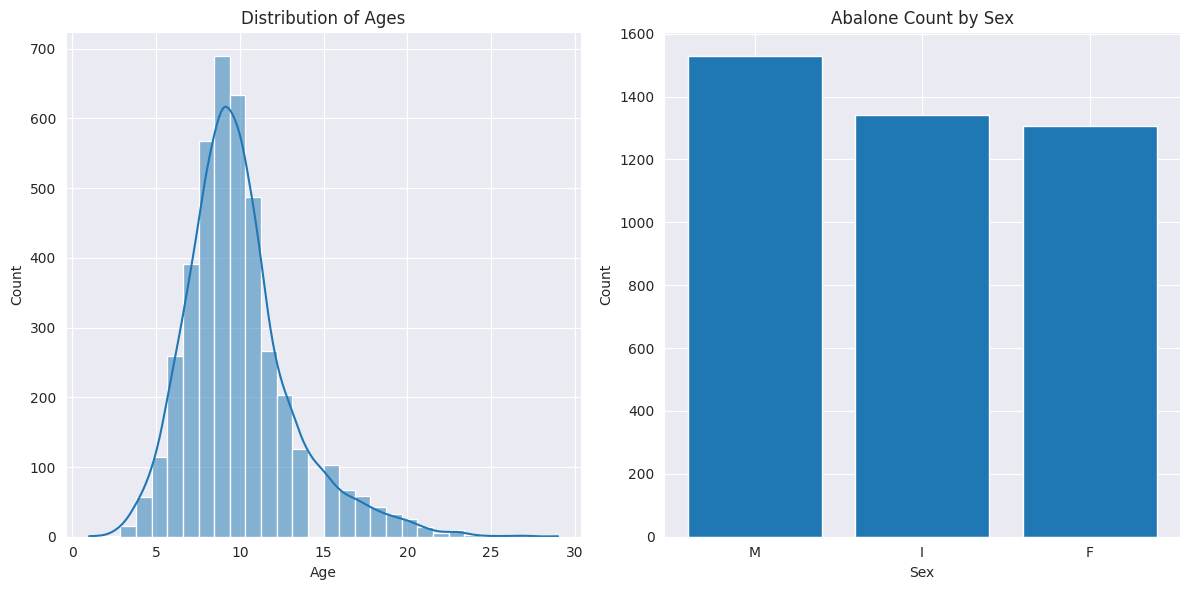

In [11]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the distribution of ages
sns.histplot(y_age, bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Ages")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Visualize the number of abalones by sex
data = pd.read_csv(url, names=column_names)
sex_counts = data["Sex"].value_counts()
axes[1].bar(sex_counts.index, sex_counts.values)
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")
axes[1].set_title("Abalone Count by Sex")
axes[1].set_xticks(range(len(sex_counts.index)))
axes[1].set_xticklabels(sex_counts.index)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()